# ロールプレイ２
今、あなたは法人調査会社に勤めています。 現在会社ででは、企業の経営データ(従業員数、売上高...)を集めたデータを保持していますが <br>
このデータをつかって、**企業の業績見通し、特に今後、倒産する可能性があるかないか** を予測し、データと併せて予測値を金融機関に販売するビジネスを行う事にしました。<br>
あなたは、この予測を担当します。

---
企業経営状況データ(company_data.csv)
*  会社コード
*  倒産フラグ
*  売上高(千円)
*  従業員数
*  資本金(千円)
*  総資本(百万円)
*  自己資本(百万円)
*  総資本経常利益率(%)
*  総資本企業収益率(%)
*  総資本税引前当期利益率(%) 
*  売上高営業費用率(%)
*  売上高売上原価率(%)
*  売上高販売管理費率(%)
*  売上高営業外収益率(%)
*  売上高営業外費用率(%)
*  売上高経常利益率(%)
*  売上高税引前当期利益率(%) 
* 売上高当期利益率(%)
*  売上高金融収支比率(%)
*  売上高金利負担率(%)
*  資本金倍率(倍)
*  総資本回転期間(月)
*  固定資産回転期間(月)
*  有形固定資産回転期間(月) 
* 売掛金回転期間(月)
*  棚卸資産回転期間(月)
*  商品・製品回転期間(月)
*  買入債務回転期間(月)
*  支払手形回転期間(月)
*  買掛金回転期間(月)
*  現預金手持日数(日)

---

### 注意！
分析は company_data.csv を使って実施してください。<br>
ただし最終レポートでは accuracy_report.csv のデータを使って<br>
実際にどのくらいの精度が出せたかも報告してください。<br>

---
※ モデルを作るときは company_data.csv をデータ分割して訓練用データ/検証用データを作るようにしてください。<br>
間違っても company_data.csv を訓練用、accuracy_report.csv を 検証用データにしてモデルを作る...のような事はしないでください。

---

In [891]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt

## データ読み込み

In [892]:
company = pd.read_csv("./data/company_data.csv")
company

,KAISHA_CODE,TOSAN_FLG,URIAGE,JUGYOIN_SU,SHIHON_KIN,SOU_SHIHON,JIKO_SHIHON,SO_SHIHON_KEIJO_RIEKI_RITU,SO_SHIHON_KIGYO_SHUEKI_RITU,SO_SHIHON_ZEIBIKIMAE_RIEKI_RITU,...,SO_SHIHON_KAITEN_KIKAN,KOTEI_SHISAN_KAITEN_KIKAN,YUKEI_KOTEI_SHISAN_KAITEN_KIKAN,URIKAKE_KAITEN_KIKAN,TANAOROSHI_KAITEN_KIKAN,SHOHIN_KAITEN_KIKAN,KAIIRE_SAIMU_KAITEN_KIKAN,SHIHARAI_TEGATA_KAITEN_KIKAN,KAIKAKE_KAITEN_KIKAN,GEN_YOKIN_TEMOCHI_NISSU
0,C09813,0,156113,2,10000,457,151,4.01,4.94,4.01,...,28.14,16.00,14.05,0.00,0.51,0.00,0.00,0.00,0.00,334.57
1,C00003,0,113483,9,10000,166,-14,37.78,39.59,38.38,...,14.06,9.45,9.08,0.56,1.18,0.06,0.40,0.00,0.40,43.36
2,C00006,0,25370,12,72400,375,-39,-27.38,-26.38,-27.38,...,74.75,49.02,39.42,1.64,14.84,9.70,6.37,0.00,4.83,7.24
3,C00011,0,7209,2,300,62,22,6.17,6.49,6.28,...,74.75,49.02,39.42,3.28,12.97,0.00,0.38,0.00,0.38,322.20
4,C00015,0,107643,3,30000,92,0,1.00,1.55,1.00,...,8.28,5.49,5.29,1.38,1.18,1.18,0.15,0.00,0.15,0.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10082,C07071,0,73920,7,10000,126,1,6.47,8.17,6.47,...,16.47,7.09,7.03,1.39,1.66,0.61,0.64,0.00,0.64,62.51
10083,C07101,0,109326,11,10000,81,-12,3.49,4.71,4.00,...,7.20,4.78,4.59,0.58,0.43,0.43,0.80,0.32,0.48,5.51
10084,C07113,0,1080622,64,319455,2469,1742,1.08,1.34,1.08,...,21.94,15.37,7.87,1.24,2.17,0.42,2.30,1.83,0.48,41.77
10085,C07121,0,919778,59,25200,1592,1213,9.80,9.94,1.92,...,16.63,6.33,4.70,4.10,1.33,1.33,1.77,0.96,0.81,136.55


## データ分析

In [893]:
company.describe()

,TOSAN_FLG,URIAGE,JUGYOIN_SU,SHIHON_KIN,SOU_SHIHON,JIKO_SHIHON,SO_SHIHON_KEIJO_RIEKI_RITU,SO_SHIHON_KIGYO_SHUEKI_RITU,SO_SHIHON_ZEIBIKIMAE_RIEKI_RITU,URIAGE_EIGYO_HIYO_RITU,...,SO_SHIHON_KAITEN_KIKAN,KOTEI_SHISAN_KAITEN_KIKAN,YUKEI_KOTEI_SHISAN_KAITEN_KIKAN,URIKAKE_KAITEN_KIKAN,TANAOROSHI_KAITEN_KIKAN,SHOHIN_KAITEN_KIKAN,KAIIRE_SAIMU_KAITEN_KIKAN,SHIHARAI_TEGATA_KAITEN_KIKAN,KAIKAKE_KAITEN_KIKAN,GEN_YOKIN_TEMOCHI_NISSU
count,10087.000000,1.008700e+04,10087.000000,1.008700e+04,10087.000000,10087.000000,10087.000000,9951.000000,10087.000000,10081.000000,...,10081.000000,10081.000000,10080.000000,10081.000000,10081.000000,10080.000000,10081.000000,10081.000000,10081.000000,10081.000000
mean,0.026866,2.603295e+06,69.240210,2.385420e+05,2173.561614,995.768514,2.201008,3.215335,1.857469,99.213891,...,13.278228,6.169051,4.728933,1.775806,1.511681,0.655158,1.382298,0.623670,0.748314,74.289881
std,0.161701,3.227547e+07,416.948212,3.353636e+06,6532.250432,3704.656916,8.983209,8.864260,9.524108,9.782118,...,9.278743,6.425339,5.348956,1.146118,1.874442,1.226031,1.077590,0.814702,0.664581,87.524091
min,0.000000,0.000000e+00,0.000000,5.000000e+01,8.000000,-467.000000,-52.130000,-50.530000,-55.120000,76.100000,...,1.940000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.120000
25%,0.000000,1.929120e+05,10.000000,1.000000e+04,210.000000,20.000000,0.130000,0.940000,0.110000,95.490000,...,7.730000,2.280000,1.430000,1.130000,0.380000,0.000000,0.560000,0.000000,0.350000,22.020000
50%,0.000000,4.709500e+05,25.000000,2.000000e+04,557.000000,129.000000,1.880000,2.970000,1.600000,98.300000,...,11.150000,4.510000,3.270000,1.510000,0.950000,0.190000,1.150000,0.190000,0.610000,47.870000
75%,0.000000,1.220843e+06,55.500000,4.890000e+04,1564.000000,537.500000,5.450000,6.260000,5.030000,100.520000,...,16.070000,7.840000,6.040000,2.100000,1.940000,0.782500,1.980000,1.110000,0.940000,93.140000
max,1.000000,2.166654e+09,26114.000000,1.747620e+08,66464.000000,37625.000000,37.780000,39.590000,41.960000,174.200000,...,74.750000,49.020000,39.420000,8.760000,14.840000,9.700000,6.370000,3.660000,4.830000,645.170000


In [894]:
company.nunique()

KAISHA_CODE                        10087
TOSAN_FLG                              2
URIAGE                             10049
JUGYOIN_SU                           502
SHIHON_KIN                          1079
SOU_SHIHON                          3485
JIKO_SHIHON                         2506
SO_SHIHON_KEIJO_RIEKI_RITU          2876
SO_SHIHON_KIGYO_SHUEKI_RITU         2828
SO_SHIHON_ZEIBIKIMAE_RIEKI_RITU     2888
URIAGE_EIGYO_HIYO_RITU              2784
URIAGE_GENKA_RITU                   4552
URIAGE_HANKANHI_RITU                4280
URIAGE_EIGYO_GAI_SHUEKI_RITU        1057
URIAGE_EIGYO_GAI_HIYO_RITU           788
URIAGE_KEIJO_RIEKI_RITU             2792
URIAGE_ZEIBIKIMAE_RIEKI_RITU        2787
URIAGE_TOKI_RIEKI_RITU              2501
URIAGE_KINYU_SHUSHI_RITU             811
URIAGE_KINRI_FUTAN_RITU              606
SHIHON_KIN_BAI_RITU                 4311
SO_SHIHON_KAITEN_KIKAN              2661
KOTEI_SHISAN_KAITEN_KIKAN           1913
YUKEI_KOTEI_SHISAN_KAITEN_KIKAN     1647
URIKAKE_KAITEN_K

#### 欠損値の確認

In [895]:
company.isna().sum()

KAISHA_CODE                          0
TOSAN_FLG                            0
URIAGE                               0
JUGYOIN_SU                           0
SHIHON_KIN                           0
SOU_SHIHON                           0
JIKO_SHIHON                          0
SO_SHIHON_KEIJO_RIEKI_RITU           0
SO_SHIHON_KIGYO_SHUEKI_RITU        136
SO_SHIHON_ZEIBIKIMAE_RIEKI_RITU      0
URIAGE_EIGYO_HIYO_RITU               6
URIAGE_GENKA_RITU                    6
URIAGE_HANKANHI_RITU                 6
URIAGE_EIGYO_GAI_SHUEKI_RITU         6
URIAGE_EIGYO_GAI_HIYO_RITU           6
URIAGE_KEIJO_RIEKI_RITU              6
URIAGE_ZEIBIKIMAE_RIEKI_RITU         6
URIAGE_TOKI_RIEKI_RITU               6
URIAGE_KINYU_SHUSHI_RITU           157
URIAGE_KINRI_FUTAN_RITU              6
SHIHON_KIN_BAI_RITU                  0
SO_SHIHON_KAITEN_KIKAN               6
KOTEI_SHISAN_KAITEN_KIKAN            6
YUKEI_KOTEI_SHISAN_KAITEN_KIKAN      7
URIKAKE_KAITEN_KIKAN                 6
TANAOROSHI_KAITEN_KIKAN  

## データ前処理

In [896]:
# データ分割を行う便利なモジュール train_test_split をインポート
from sklearn.model_selection import train_test_split

# データの標準化を行うためのモジュールをインポート
from sklearn.preprocessing import StandardScaler

In [897]:
def preprocess(df):
    ### 一度 fillNAをしてみる
    ### fillna してもいいのか吟味する必要はあり
    df.fillna(0, inplace=True)
#     df.dropna(inplace=True)
    
    columnList = df.columns.tolist()
    ## 各会社固有のコードなので削除
    columnList.remove("KAISHA_CODE")
    
    columnList.remove("URIAGE")
    columnList.remove("JUGYOIN_SU")
    columnList.remove("SHIHON_KIN")
    columnList.remove("JIKO_SHIHON")
#     columnList.remove("SO_SHIHON_KEIJO_RIEKI_RITU")
#     columnList.remove("SO_SHIHON_KIGYO_SHUEKI_RITU")
#     columnList.remove("SO_SHIHON_ZEIBIKIMAE_RIEKI_RITU")
#     columnList.remove("URIAGE_EIGYO_HIYO_RITU")
#     columnList.remove("URIAGE_GENKA_RITU")
#     columnList.remove("URIAGE_HANKANHI_RITU")
#     columnList.remove("URIAGE_EIGYO_GAI_SHUEKI_RITU")

#     columnList.remove("SO_SHIHON_KAITEN_KIKAN")
#     columnList.remove("KOTEI_SHISAN_KAITEN_KIKAN")
#     columnList.remove("YUKEI_KOTEI_SHISAN_KAITEN_KIKAN")
#     columnList.remove("URIKAKE_KAITEN_KIKAN")
#     columnList.remove("TANAOROSHI_KAITEN_KIKAN")
#     columnList.remove("SHOHIN_KAITEN_KIKAN")
 
    ## 目的変数なので削除
    columnList.remove("TOSAN_FLG")

    X = pd.DataFrame( df.loc[:, columnList] )
    y = pd.DataFrame( df.loc[:, ["TOSAN_FLG"]] )
    
    return X, y




## 使用データ決定
X, y = preprocess(company)

# データを訓練用データ・検証用データに分ける (訓練：検証　＝ 7:3)
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size = 0.3, random_state=1234)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

print('='*10)
tmp = y_train.sum()/y_train.count()
print(f'TRAIN. TOSAN_FLG = {float(tmp):.2%}')
tmp = y_test.sum()/y_test.count()
print(f'TEST. TOSAN_FLG = {float(tmp):.2%}')

(7060, 25)
(7060, 1)
(3027, 25)
(3027, 1)
TRAIN. TOSAN_FLG = 2.72%
TEST. TOSAN_FLG = 2.61%


#### 変数の標準化  
各変数、当該変数の平均値を引いてから、当該変数の標準偏差で割ります。（標準化）
変数のスケールを揃えるために実行しています。

In [898]:
# 説明変数を標準化（平均0、標準偏差1となるように変数変換）する
# 標準偏差と正規化 http://ailaby.com/scaler/

def standard(X_train, X_test):
    sclr_X = StandardScaler()
    sclr_X.fit(X_train)
    X_train = sclr_X.transform(X_train)
    X_test = sclr_X.transform(X_test)
    
    return X_train, X_test

## 不均衡データ処理

### アンダーサンプリング
不均衡データ（0と1がアンバランス）な場合、比率を調整しておくことで、Precision や Recall が悪いモデルが構築されるのを避ける事ができます。

RandomUnderSampler メソッドは 0 と 1 の比率を予め指定してから、説明変数・目的変数をセットで入力すると、0 を間引いてサンプリングする事で、指定した比率にサンプリングしたデータを返してくれます。

In [899]:
## アンダーサンプリング用のライブラリをインポート
from imblearn.under_sampling import RandomUnderSampler

In [900]:
def UnderSampling(X_train, y_train):
    print("\n==== アンダーサンプリングを行う")
    ## 正例の数を保存
    positive_count_train = int(y_train["TOSAN_FLG"].sum())
    ## 正例が20%になるまで負例をアンダーサンプリング
    rus = RandomUnderSampler({0: positive_count_train*4, 1: positive_count_train}, random_state=1234)
    print(rus)
    
    ## 学習用データに反映
    X_train, y_train = rus.fit_sample(X_train, y_train)
    
    # サンプリング結果を表示
    print( "-----------------------------------------------------" )
    print( "サンプリング後の説明変数の数と件数：" + str(X_train.shape) )
    print( "サンプリング後の目的変数の数と件数：" + str(y_train.shape) )
    print( "-----------------------------------------------------" )
    print( "サンプリング後の目的変数＝ 0 の件数：" + str(int(y_train.shape[0] - y_train.sum()) ))
    print( "サンプリング後の目的変数＝ 1 の件数：" + str(int(y_train.sum()) ))
    print( "-----------------------------------------------------" )
    
    return X_train, y_train

### オーバーサンプリング
不均衡データ（0と1がアンバランス）な場合、比率を調整しておくことで、Precision や Recall が悪いモデルが構築されるのを避ける事ができます。

RandomOverSampler メソッドは 0 と 1 の比率を予め指定してから、説明変数・目的変数をセットで入力すると、1 を重複してサンプリングする事で、指定した比率にサンプリングしたデータを返してくれます。

In [901]:
## オーバーサンプリング用のライブラリをインポート
from imblearn.over_sampling import RandomOverSampler

In [902]:
def OverSampling(X_train, y_train):
    print("\n==== オーバーサンプリングを行う")
    ## 負例の数を保存
    negative_count_train = int(y_train.count() - y_train["TOSAN_FLG"].sum())
    ## 正例が20%になるまで正例をオーバーサンプリング
    rus = RandomOverSampler({0: negative_count_train, 1: int(negative_count_train*0.2)}, random_state=1234)
    print(rus)

    ## 学習用データに反映
    X_train, y_train = rus.fit_sample(X_train, y_train)
    
    # サンプリング結果を表示
    print( "-----------------------------------------------------" )
    print( "サンプリング後の説明変数の数と件数：" + str(X_train.shape) )
    print( "サンプリング後の目的変数の数と件数：" + str(y_train.shape) )
    print( "-----------------------------------------------------" )
    print( "サンプリング後の目的変数＝ 0 の件数：" + str(int(y_train.shape[0] - y_train.sum()) ))
    print( "サンプリング後の目的変数＝ 1 の件数：" + str(int(y_train.sum()) ))
    print( "-----------------------------------------------------" )
    
    return X_train, y_train

### SMOTE オーバーサンプリング
不均衡データ（0と1がアンバランス）な場合、比率を調整しておくことで、Precision や Recall が悪いモデルが構築されるのを避ける事ができます。

SMOTE メソッドは 0 と 1 の比率を予め指定してから、説明変数・目的変数をセットで入力すると、数の少ない方のサンプルをオーバーサンプリングし、 **0 と 1 の比率を 1 : 1**にしてくれます。

オーバーサンプリング時に、元サンプルのうち比較的近い値をもつデータを何点かつかって（個数は k_neighbors で指定）、「何点かのデータからアルゴリズム※に従って生成した説明変数」「オーバーサンプリングする側の値を目的変数」とした新たなサンプル（元データに無いサンプル）を生成します。

In [903]:
# SMOTE用のライブラリをインポート
from imblearn.over_sampling import SMOTE

In [904]:
def SMOTESampling(X_train, y_train):
    print("\n==== (SMOTE) オーバーサンプリングを行う")
    ## サンプル生成に使用するサンプル数 k_neighbors
    smote_s = SMOTE( k_neighbors=3, random_state=1234)
    print(smote_s)
    
    ## 学習用データに反映
    X_train, y_train = smote_s.fit_sample(X_train, y_train)
    
    # サンプリング結果を表示
    print( "-----------------------------------------------------" )
    print( "サンプリング後の説明変数の数と件数：" + str(X_train.shape) )
    print( "サンプリング後の目的変数の数と件数：" + str(y_train.shape) )
    print( "-----------------------------------------------------" )
    print( "サンプリング後の目的変数＝ 0 の件数：" + str(int(y_train.shape[0] - y_train.sum()) ))
    print( "サンプリング後の目的変数＝ 1 の件数：" + str(int(y_train.sum()) ))
    print( "-----------------------------------------------------" )
    
    return X_train, y_train

## クロスバリデーション

**データ**

* 学習データ:テストデータ = 7:3
* <s>学習データ(学習):学習データ(テスト) = 8:2 (cv=5)</s>

正例が 3% しかないため 【 オーバーサンプリング / アンダーサンプリング 】を行う
データがかなり少ないため「クロスバリデーション」で数を減らしてしまうと影響が大きくなる。ので一度導入しないで実装を行う

## 精度検証

In [905]:
# 正解率を作成するためのモジュールをインポート
from sklearn.metrics import accuracy_score

# 混合行列を作成するためのモジュールをインポート
from sklearn.metrics import confusion_matrix

# ROCを作成する
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

---

#### ROC曲線
ROC (Receiver Operating Characteristic) curve

検査や診断薬の性能を2次元のグラフに表したもの。当該検査で異常と正常を区別するカットオフポイントごとに真陽性率（=TPF）と偽陽性率（=FPF）を計算し、縦軸にTPF、横軸にFPFをとった平面にプロットして線で結んで表す。

ROC曲線を作成した時に、グラフの下の部分の面積をAUC（Area Under the Curve）とよぶ。AUCは0から1までの値をとり、値が1に近いほど判別能が高いことを示す。

---
#### predict(X)
* [データ数]行 × [次元数]列の特徴量行列 X を引数にして、データ数分の予測ラベルを返す

#### predict_proba(X)
* [データ数]行 × [次元数]列の特徴量行列 X を引数にして、各データがそれぞれのクラスに所属する確率を返す。「列はクラス名でソートされていて、そのクラス名は classes_で見れる」

---

#### ROC曲線を算出・プロット: roc_curve()

ROC曲線の算出にはsklearn.metricsモジュールのroc_curve()関数を使う。

sklearn.metrics.roc_curve — scikit-learn 0.20.3 documentation
第一引数に正解クラス、第二引数に予測スコアのリストや配列をそれぞれ指定する。

予測スコアは機械学習のモデルなどによって予測された確率で、例えば1.0だと100%の確率で1だと予測、0.8だと80%の確率で1だと予測しているという意味合いの値。

roc_curve()は3つの要素を持つタプルを返す。
* 3つの要素は順番にfpr, tpr, thresholdsで、それぞれFPR（偽陽性率）、TPR（真陽性率）、閾値
* 閾値：クラス０or１を分けるときの基準値 [配列]

---

In [906]:
result = pd.DataFrame(columns=["訓練精度%", "検証精度%", "AUC(訓練)", "AUC(検証)", "AUC rate", "訓練(TN 0->0)%", "訓練(FP 0->1)%", "訓練(FN 1->0)%", "訓練(TP 1->1)%", "検証(TN 0->0)%", "検証(FP 0->1)%", "検証(FN 1->0)%", "検証(TP 1->1)%" ])

# idx = result["タイトル"].values.tolist().index("a")
# result.drop(index=idx, inplace=True)
result

,訓練精度%,検証精度%,AUC(訓練),AUC(検証),AUC rate,訓練(TN 0->0)%,訓練(FP 0->1)%,訓練(FN 1->0)%,訓練(TP 1->1)%,検証(TN 0->0)%,検証(FP 0->1)%,検証(FN 1->0)%,検証(TP 1->1)%


In [907]:
result = result

def accuracy(title, clf, X_train, y_train, X_test, y_test):
    if title in result.index.tolist():
        result.drop(index=title, inplace=True)
        
    appendlst = [0]*13
    
    print("\n===  精度検証（訓練用データを確認）")
    print(accuracy_score(y_train, clf.predict(X_train)))
    conf_mtrx_df = pd.DataFrame(confusion_matrix(y_train, clf.predict(X_train).reshape(-1, 1)))
    conf_mtrx_df.rename(columns={0: 'predict(0)', 1: 'predict(1)'}, index={0: 'target(0)', 1: 'target(1)'}, inplace=True)
    display(conf_mtrx_df)
    
    appendlst[0] = accuracy_score(y_train, clf.predict(X_train))*100
    appendlst[5:7] = (conf_mtrx_df.loc['target(0)', :]*100/sum(conf_mtrx_df.loc['target(0)', :])).tolist()
    appendlst[7:9] = (conf_mtrx_df.loc['target(1)', :]*100/sum(conf_mtrx_df.loc['target(1)', :])).tolist()
    
    print("\n===  精度検証（検証用データを確認）")
    print(accuracy_score(y_test, clf.predict(X_test)))
    conf_mtrx_df = pd.DataFrame(confusion_matrix(y_test, clf.predict(X_test).reshape(-1, 1)))
    conf_mtrx_df.rename(columns={0: 'predict(0)', 1: 'predict(1)'}, index={0: 'target(0)', 1: 'target(1)'}, inplace=True)
    display(conf_mtrx_df)
    
    appendlst[1] = accuracy_score(y_test, clf.predict(X_test))*100
    appendlst[9:11] = (conf_mtrx_df.loc['target(0)', :]*100/sum(conf_mtrx_df.loc['target(0)', :])).tolist()
    appendlst[11:13] = (conf_mtrx_df.loc['target(1)', :]*100/sum(conf_mtrx_df.loc['target(1)', :])).tolist()
    
    print("\n ==== ROC ")
    # 訓練用データ
    # FPR TPR (閾値) AUC を算出
    y_train_predict = clf.predict_proba(X_train)[:, 1]
    fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_predict)
    auc_value_train = auc(fpr_train, tpr_train)
    ## ROC をプロット
    plt.plot(fpr_train, tpr_train, label='ROC curve (area = %.2f)'%auc_value_train )
    plt.legend()
    plt.title('ROC curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.grid(True)
    print('AUC(train): '+str(auc_value_train))
    
    
    # 検証用データ
    # FPR、TPR、（閾値）、AUCを算出
    y_test_predict = clf.predict_proba(X_test)[:, 1]
    fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_predict)
    auc_value_test = auc(fpr_test, tpr_test)
    ## ROC曲線をプロット
    plt.plot(fpr_test, tpr_test, label='ROC curve (area = %.2f)'%auc_value_test)
    plt.legend()
    plt.title('ROC curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.grid(True)
    print("AUC(test): "+str(auc_value_test))
    print("AUC ratio(train/test): "+str(auc_value_train/auc_value_test))
    
    appendlst[2:5] = [auc_value_train, auc_value_test, (auc_value_train/auc_value_test)]
    
    
    result.loc[title] = appendlst

# 実際のデータでの精度結果 ( accuracy_report )


In [908]:
accuracy_report = pd.read_csv('./data/accuracy_report.csv')
accuracy_report

,KAISHA_CODE,TOSAN_FLG,URIAGE,JUGYOIN_SU,SHIHON_KIN,SOU_SHIHON,JIKO_SHIHON,SO_SHIHON_KEIJO_RIEKI_RITU,SO_SHIHON_KIGYO_SHUEKI_RITU,SO_SHIHON_ZEIBIKIMAE_RIEKI_RITU,...,SO_SHIHON_KAITEN_KIKAN,KOTEI_SHISAN_KAITEN_KIKAN,YUKEI_KOTEI_SHISAN_KAITEN_KIKAN,URIKAKE_KAITEN_KIKAN,TANAOROSHI_KAITEN_KIKAN,SHOHIN_KAITEN_KIKAN,KAIIRE_SAIMU_KAITEN_KIKAN,SHIHARAI_TEGATA_KAITEN_KIKAN,KAIKAKE_KAITEN_KIKAN,GEN_YOKIN_TEMOCHI_NISSU
0,C07138,0,142375,11,10000,148,24,-4.40,-3.59,1.99,...,10.04,4.79,4.29,1.07,2.05,2.05,1.34,0.00,1.34,65.43
1,C07167,0,772682,91,15500,517,-155,9.98,13.61,10.14,...,6.43,2.70,1.73,1.02,1.54,0.46,0.77,0.00,0.77,16.98
2,C07181,0,255005,23,76550,255,135,5.16,5.81,2.68,...,9.61,3.75,3.04,0.92,0.55,0.00,0.51,0.00,0.51,83.12
3,C07184,1,48838,10,250000,550,160,0.34,0.40,0.27,...,74.75,13.63,0.40,0.27,14.84,9.70,2.59,0.00,2.59,1.45
4,C07191,0,461824,16,33000,554,48,7.61,10.54,5.59,...,11.52,4.99,3.75,2.70,1.77,0.86,1.35,0.00,1.35,43.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2461,C12495,0,12808,3,3000,13,10,-2.75,-2.75,-2.75,...,9.77,3.48,1.03,1.34,0.47,0.00,1.20,0.91,0.30,136.60
2462,C12497,0,35814,2,5000,21,5,2.71,4.46,3.13,...,5.72,2.43,0.61,1.84,0.03,0.03,1.49,0.00,1.49,16.17
2463,C12510,0,153795,8,3000,89,-18,6.11,11.62,6.11,...,5.56,0.86,0.71,2.15,0.19,0.19,0.64,0.00,0.64,0.81
2464,C12512,0,186137,5,5000,78,-17,2.22,4.05,2.25,...,4.06,1.42,1.38,0.56,0.73,0.65,0.20,0.00,0.20,11.38


In [909]:
accuracy_report["TOSAN_FLG"].sum()

51

In [910]:
result_report = pd.DataFrame(columns=["accuracy(%)","AUC", "(TN 0->0)%", "(FP 0->1)%", "(FN 1->0)%", "(TP 1->1)%"])

result_report

,accuracy(%),AUC,(TN 0->0)%,(FP 0->1)%,(FN 1->0)%,(TP 1->1)%


In [911]:
result_report = result_report

def report_ACC(title, clf, reportX, reporty):
    if title in result_report.index.tolist():
        result_report.drop(index=title, inplace=True)
        
    appendlst = [0]*6
    
    print('-'*30)
    print("\n===  精度検証（レポート用データを確認）")
    print(accuracy_score(reporty, clf.predict(reportX)))
    conf_mtrx_df = pd.DataFrame(confusion_matrix(reporty, clf.predict(reportX).reshape(-1, 1)))
    conf_mtrx_df.rename(columns={0: 'predict(0)', 1: 'predict(1)'}, index={0: 'target(0)', 1: 'target(1)'}, inplace=True)
    display(conf_mtrx_df)
    
    appendlst[0] = accuracy_score(reporty, clf.predict(reportX))*100
    appendlst[2:4] = (conf_mtrx_df.loc['target(0)', :]*100/sum(conf_mtrx_df.loc['target(0)', :])).tolist()
    appendlst[4:6] = (conf_mtrx_df.loc['target(1)', :]*100/sum(conf_mtrx_df.loc['target(1)', :])).tolist()
    
    print("\n==== ROC ")
    # 訓練用データ
    # FPR TPR (閾値) AUC を算出
    y_predict = clf.predict_proba(reportX)[:, 1]
    fpr, tpr, thresholds = roc_curve(reporty, y_predict)
    auc_value = auc(fpr, tpr)
    ## ROC をプロット
    plt.plot(fpr, tpr, label='ROC curve (area = %.2f)'%auc_value )
    plt.legend()
    plt.title('ROC curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.grid(True)
    print('AUC: '+str(auc_value))
    
    appendlst[1] = auc_value
    
    
    result_report.loc[title] = appendlst

# ロジスティック回帰
ロジスティック回帰モデルをつくります。
ロジスティック回帰モデルを作成するときは、以下のパラメータを（一部でいいので）設定する必要があります。
*   fit_intercept：切片を入れるか？
*   penalty：正則化の方法を指定するパラメータ l1 か l2 を指定。（Lassoを実施する際はL1正則化項を入れたいのでl1を指定する）
*   solver：Lasso回帰を実施する際は 'liblinear' を指定する必要がある。（計算をする際に「ソルバー」という機能が必要なのですが、デフォルトのソルバーはL2用なので変更してあげる必要があります。）
*   C：正則化の強さを指定するパラメータ。正の値を指定する（デフォルト値は1.0）。Cの値が小さいほど、強く正則化する。

In [912]:
# ロジスティック回帰を行うためのモジュールをインポート
from sklearn.linear_model import LogisticRegression


==== アンダーサンプリングを行う
RandomUnderSampler(random_state=1234, sampling_strategy={0: 768, 1: 192})
-----------------------------------------------------
サンプリング後の説明変数の数と件数：(960, 25)
サンプリング後の目的変数の数と件数：(960, 1)
-----------------------------------------------------
サンプリング後の目的変数＝ 0 の件数：768
サンプリング後の目的変数＝ 1 の件数：192
-----------------------------------------------------

===  精度検証（訓練用データを確認）
0.8625


,predict(0),predict(1)
target(0),733,35
target(1),97,95



===  精度検証（検証用データを確認）
0.9236868186323092


,predict(0),predict(1)
target(0),2767,181
target(1),50,29



 ==== ROC 
AUC(train): 0.9032185872395833
AUC(test): 0.8712665097985332
AUC ratio(train/test): 1.0366731385651888


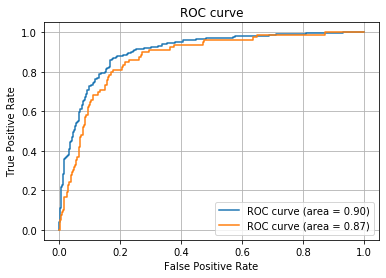

In [913]:
## アンダーサンプリング
X_train_smp, y_train_smp = UnderSampling(X_train, y_train)
## 標準化
X_train_smp_std, X_test_smp_std = standard(X_train_smp, X_test)
## 学習
clf = LogisticRegression(C=1000)
clf.fit(X_train_smp_std, y_train_smp)
## 精度を表示
accuracy("Logistic_Under", clf, X_train_smp_std, y_train_smp, X_test_smp_std, y_test)

------------------------------

===  精度検証（レポート用データを確認）
0.9399837793998378


,predict(0),predict(1)
target(0),2293,122
target(1),26,25



==== ROC 
AUC: 0.8768887265050948


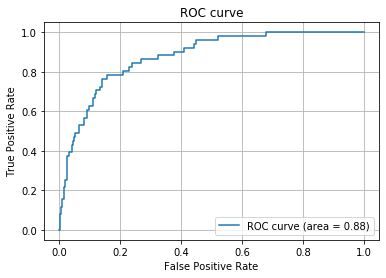

In [914]:
## データ前処理
reportX, reporty = preprocess(accuracy_report)
## 標準化
X_train_smp_std, reportX_std = standard(X_train_smp, reportX)
## レポート用の精度
report_ACC("Logistic_Under", clf, reportX_std, reporty)


==== オーバーサンプリングを行う
RandomOverSampler(random_state=1234, sampling_strategy={0: 6868, 1: 1373})
-----------------------------------------------------
サンプリング後の説明変数の数と件数：(8241, 25)
サンプリング後の目的変数の数と件数：(8241, 1)
-----------------------------------------------------
サンプリング後の目的変数＝ 0 の件数：6868
サンプリング後の目的変数＝ 1 の件数：1373
-----------------------------------------------------

===  精度検証（訓練用データを確認）
0.8705254216721272


,predict(0),predict(1)
target(0),6620,248
target(1),819,554



===  精度検証（検証用データを確認）
0.9408655434423522


,predict(0),predict(1)
target(0),2826,122
target(1),57,22



 ==== ROC 
AUC(train): 0.8927519288923879
AUC(test): 0.8709358844442918
AUC ratio(train/test): 1.0250489672520682


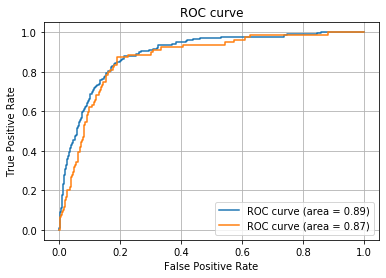

In [915]:
## オーバーサンプリング
X_train_smp, y_train_smp = OverSampling(X_train, y_train)
## 標準化
X_train_smp_std, X_test_smp_std = standard(X_train_smp, X_test)
## 学習
clf = LogisticRegression(C=1000)
clf.fit(X_train_smp_std, y_train_smp)
## 精度を表示
accuracy("Logistic_Over", clf, X_train_smp_std, y_train_smp, X_test_smp_std, y_test)

------------------------------

===  精度検証（レポート用データを確認）
0.9509326845093269


,predict(0),predict(1)
target(0),2324,91
target(1),30,21



==== ROC 
AUC: 0.8664880444931596


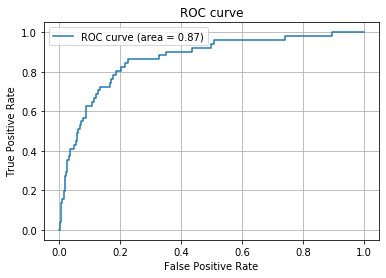

In [916]:
## データ前処理
reportX, reporty = preprocess(accuracy_report)
## 標準化
X_train_smp_std, reportX_std = standard(X_train_smp, reportX)
## レポート用の精度
report_ACC("Logistic_Over", clf, reportX_std, reporty)


==== (SMOTE) オーバーサンプリングを行う
SMOTE(k_neighbors=3, random_state=1234)
-----------------------------------------------------
サンプリング後の説明変数の数と件数：(13736, 25)
サンプリング後の目的変数の数と件数：(13736, 1)
-----------------------------------------------------
サンプリング後の目的変数＝ 0 の件数：6868
サンプリング後の目的変数＝ 1 の件数：6868
-----------------------------------------------------

===  精度検証（訓練用データを確認）
0.8555620267909144


,predict(0),predict(1)
target(0),5767,1101
target(1),883,5985



===  精度検証（検証用データを確認）
0.8414271555996036


,predict(0),predict(1)
target(0),2485,463
target(1),17,62



 ==== ROC 
AUC(train): 0.9163859834285872
AUC(test): 0.8709702351304468
AUC ratio(train/test): 1.0521438580404971


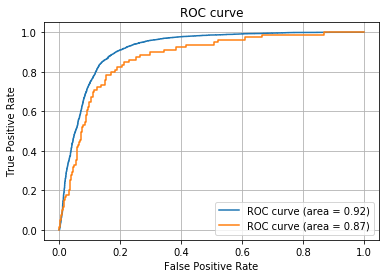

In [917]:
## (SMOTE) オーバーサンプリング
X_train_smp, y_train_smp = SMOTESampling(X_train, y_train)
## 標準化
X_train_smp_std, X_test_smp_std = standard(X_train_smp, X_test)
## 学習
clf = LogisticRegression(C=1000)
clf.fit(X_train_smp_std, y_train_smp)
## 精度を表示
accuracy("Logistic_SMOTE", clf, X_train_smp_std, y_train_smp, X_test_smp_std, y_test)

------------------------------

===  精度検証（レポート用データを確認）
0.8475263584752636


,predict(0),predict(1)
target(0),2052,363
target(1),13,38



==== ROC 
AUC: 0.8694190719766168


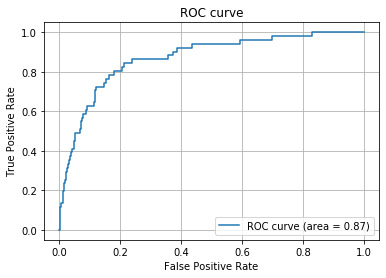

In [918]:
## データ前処理
reportX, reporty = preprocess(accuracy_report)
## 標準化
X_train_smp_std, reportX_std = standard(X_train_smp, reportX)
## レポート用の精度
report_ACC("Logistic_SMOTE", clf, reportX_std, reporty)

## Decision Tree Classifier

決定木モデルをつくります。
決定木モデルを作成するときは、以下のパラメータを（一部でいいので）設定する必要があります。
*   class_weight：予測するクラスに対して重要度の重みを付ける場合に使う引数ですが、原則 None（重みは平等）で結構です。
*   criterion：分割を決定するのに用いる不純度を決めます。'gini'ならばジニ係数、'entropy'ならばエントロピーを不純度として用います。
*   max_depth：木の最大深さを決めます。Noneの場合は全ての葉が純粋（単独クラス）になるまで木が成長します。（他のパラメータによって停止される可能性はある）
*   max_features：使用する変数の数の上限を決めます。
*   max_leaf_nodes：最大の葉の数をきめます。ここで指定した葉の数以内で、もっともcriterionが低くなるように木が成長します。
*   min_impurity_decrease：ここで設定した値以上のcriterionの減少を引き起こす場合のみ、ノードは分割されるようになります。（criterionの減少に効果的ではない分割が発生しないようになります。）
*   min_impurity_split：使われなくなった引数です。原則、設定しません。（Scikit-learn 0.19以降）
*   min_samples_leaf：１つの葉に必要なサンプルの最小数。ここで指定するよりも小さなサンプル数になってしまう葉は生成させません。
*   min_samples_split：ノードを分割するために必要なサンプルの最小数。ここで指定するよりも小さなサンプル数のノードは分割されません。
*   min_weight_fraction_leaf：葉に必要な（すべての入力サンプルの）重みの合計の最小加重部分。原則、設定不要です。
*   presort：分割の閾値の発見を早めるためにデータを事前にソートしておくかを決めますが、大きいデータだとソートに時間がかかるため、かえって速度が遅くなる可能性もあります。原則、設定不要です。
*   random_state：分割の閾値を決めるときに乱数をしようする場合があり、その際のシードの値を入力します。（値を定めておくと処理の再現性が得られます）
*   splitter：分割の閾値を決める場合に使うアルゴリズムを選択します。原則、設定不要です。

In [919]:
# 決定木構築用クラスをインポート
from sklearn.tree import DecisionTreeClassifier

# 決定木可視化用モジュール群をインポート
from sklearn.tree import export_graphviz


==== アンダーサンプリングを行う
RandomUnderSampler(random_state=1234, sampling_strategy={0: 768, 1: 192})
-----------------------------------------------------
サンプリング後の説明変数の数と件数：(960, 25)
サンプリング後の目的変数の数と件数：(960, 1)
-----------------------------------------------------
サンプリング後の目的変数＝ 0 の件数：768
サンプリング後の目的変数＝ 1 の件数：192
-----------------------------------------------------

===  精度検証（訓練用データを確認）
0.8729166666666667


,predict(0),predict(1)
target(0),723,45
target(1),77,115



===  精度検証（検証用データを確認）
0.8982490915097456


,predict(0),predict(1)
target(0),2677,271
target(1),37,42



 ==== ROC 
AUC(train): 0.872775607638889
AUC(test): 0.7876977311371794
AUC ratio(train/test): 1.1080082792404198


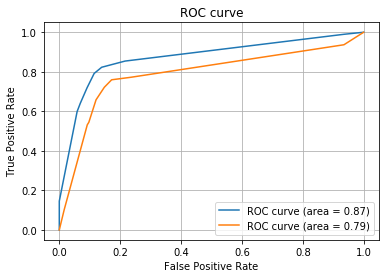

In [920]:
## アンダーサンプリング
X_train_smp, y_train_smp = UnderSampling(X_train, y_train)
## 標準化
X_train_smp_std, X_test_smp_std = standard(X_train_smp, X_test)
## 学習
clf = DecisionTreeClassifier(criterion='gini', max_leaf_nodes=10, random_state=1234)
clf.fit(X_train_smp_std, y_train_smp)
## 精度を表示
accuracy("Tree_Under", clf, X_train_smp_std, y_train_smp, X_test_smp_std, y_test)

------------------------------

===  精度検証（レポート用データを確認）
0.9193025141930251


,predict(0),predict(1)
target(0),2245,170
target(1),29,22



==== ROC 
AUC: 0.7353550115698454


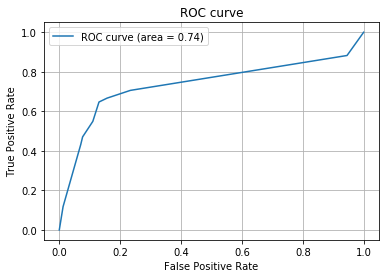

In [921]:
## データ前処理
reportX, reporty = preprocess(accuracy_report)
## 標準化
X_train_smp_std, reportX_std = standard(X_train_smp, reportX)
## レポート用の精度
report_ACC("Tree_Under", clf, reportX_std, reporty)


==== オーバーサンプリングを行う
RandomOverSampler(random_state=1234, sampling_strategy={0: 6868, 1: 1373})
-----------------------------------------------------
サンプリング後の説明変数の数と件数：(8241, 25)
サンプリング後の目的変数の数と件数：(8241, 1)
-----------------------------------------------------
サンプリング後の目的変数＝ 0 の件数：6868
サンプリング後の目的変数＝ 1 の件数：1373
-----------------------------------------------------

===  精度検証（訓練用データを確認）
0.8836306273510496


,predict(0),predict(1)
target(0),6473,395
target(1),564,809



===  精度検証（検証用データを確認）
0.9273207796498183


,predict(0),predict(1)
target(0),2771,177
target(1),43,36



 ==== ROC 
AUC(train): 0.8760483295234113
AUC(test): 0.8062900400185492
AUC ratio(train/test): 1.086517612822375


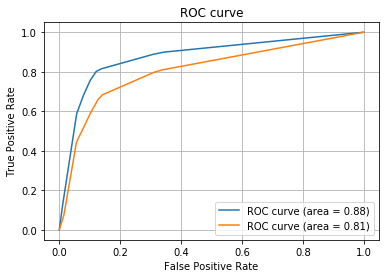

In [922]:
## オーバーサンプリング
X_train_smp, y_train_smp = OverSampling(X_train, y_train)
## 標準化
X_train_smp_std, X_test_smp_std = standard(X_train_smp, X_test)
## 学習
clf = DecisionTreeClassifier(criterion='gini', max_leaf_nodes=10, random_state=1234)
clf.fit(X_train_smp_std, y_train_smp)
## 精度を表示
accuracy("Tree_Over", clf, X_train_smp_std, y_train_smp, X_test_smp_std, y_test)

------------------------------

===  精度検証（レポート用データを確認）
0.929845904298459


,predict(0),predict(1)
target(0),2270,145
target(1),28,23



==== ROC 
AUC: 0.8345227946250965


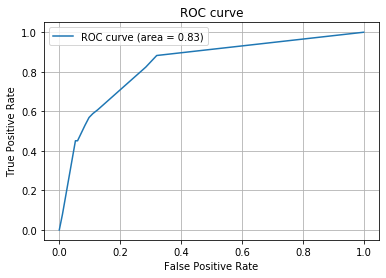

In [923]:
## データ前処理
reportX, reporty = preprocess(accuracy_report)
## 標準化
X_train_smp_std, reportX_std = standard(X_train_smp, reportX)
## レポート用の精度
report_ACC("Tree_Over", clf, reportX_std, reporty)


==== (SMOTE) オーバーサンプリングを行う
SMOTE(k_neighbors=3, random_state=1234)
-----------------------------------------------------
サンプリング後の説明変数の数と件数：(13736, 25)
サンプリング後の目的変数の数と件数：(13736, 1)
-----------------------------------------------------
サンプリング後の目的変数＝ 0 の件数：6868
サンプリング後の目的変数＝ 1 の件数：6868
-----------------------------------------------------

===  精度検証（訓練用データを確認）
0.856144437973209


,predict(0),predict(1)
target(0),5718,1150
target(1),826,6042



===  精度検証（検証用データを確認）
0.8252395110670631


,predict(0),predict(1)
target(0),2440,508
target(1),21,58



 ==== ROC 
AUC(train): 0.8938670949214897
AUC(test): 0.8261232674372669
AUC ratio(train/test): 1.0820020814743208


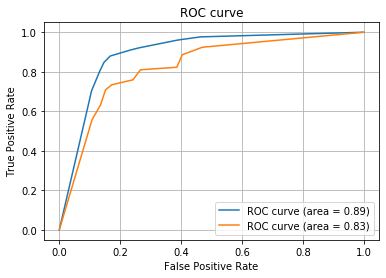

In [924]:
## (SMOTE) オーバーサンプリング
X_train_smp, y_train_smp = SMOTESampling(X_train, y_train)
## 標準化
X_train_smp_std, X_test_smp_std = standard(X_train_smp, X_test)
## 学習
clf = DecisionTreeClassifier(criterion='gini', max_leaf_nodes=10, random_state=1234)
clf.fit(X_train_smp_std, y_train_smp)
## 精度を表示
accuracy("Tree_SMOTE", clf, X_train_smp_std, y_train_smp, X_test_smp_std, y_test)

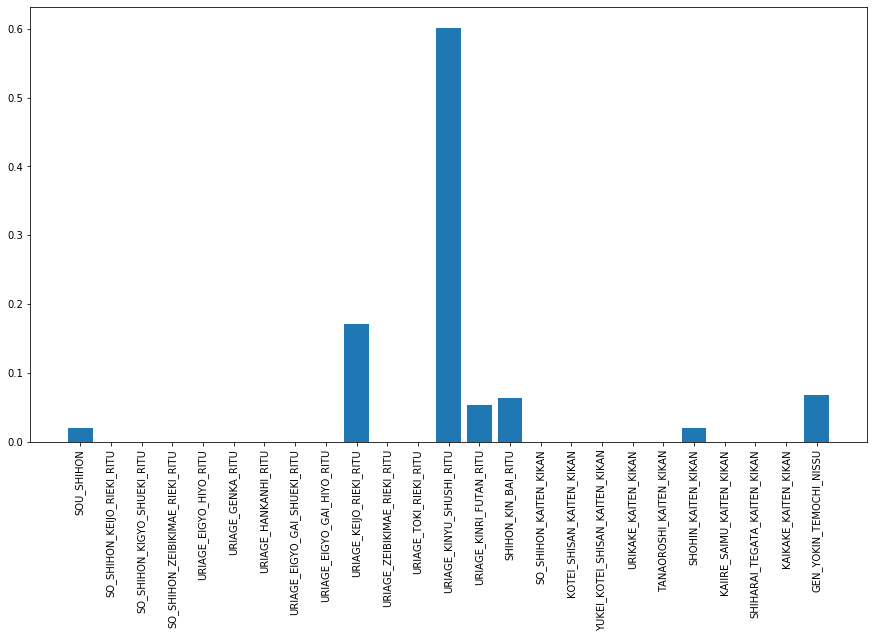

In [925]:
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
ax.bar(x=X_train.columns.tolist(), height=clf.feature_importances_)
ax.set_xticklabels(X_train.columns.tolist(), rotation=90);

------------------------------

===  精度検証（レポート用データを確認）
0.851581508515815


,predict(0),predict(1)
target(0),2059,356
target(1),10,41



==== ROC 
AUC: 0.8609385783298826


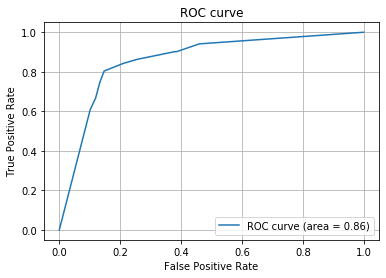

In [926]:
# データ前処理
reportX, reporty = preprocess(accuracy_report)
## 標準化
X_train_smp_std, reportX_std = standard(X_train_smp, reportX)
## レポート用の精度
report_ACC("Tree_SMOTE", clf, reportX_std, reporty)

## サポートベクターマシーン

SVMで線形判別モデルをつくります。
SVMでモデルを作成するときは、以下のパラメータを（一部でいいので）設定する必要があります。
*   C：ソフトマージンの厳しさを表すパラメータ（デフォルト1.0、データ解析者が決めるハイパーパラメータ）
*   kernel：カーネル関数を指定する（カーネルトリックを使わない際は linear、使う際は rbf などを指定する）
*   gamma：カーネルトリックを使う際のパラメータ（、データ解析者が決めるハイパーパラメータ）
*   probability：確率をアウトプットする際はTrueにする。（デフォルトFalse）

In [927]:
# サポートベクターマシンを行うためのモジュールをインポート
from sklearn.svm import SVC


==== アンダーサンプリングを行う
RandomUnderSampler(random_state=1234, sampling_strategy={0: 768, 1: 192})
-----------------------------------------------------
サンプリング後の説明変数の数と件数：(960, 25)
サンプリング後の目的変数の数と件数：(960, 1)
-----------------------------------------------------
サンプリング後の目的変数＝ 0 の件数：768
サンプリング後の目的変数＝ 1 の件数：192
-----------------------------------------------------

===  精度検証（訓練用データを確認）
0.8833333333333333


,predict(0),predict(1)
target(0),743,25
target(1),87,105



===  精度検証（検証用データを確認）
0.9233564585398084


,predict(0),predict(1)
target(0),2761,187
target(1),45,34



 ==== ROC 
AUC(train): 0.9237297905815972
AUC(test): 0.8902195008845302
AUC ratio(train/test): 1.037642727062001


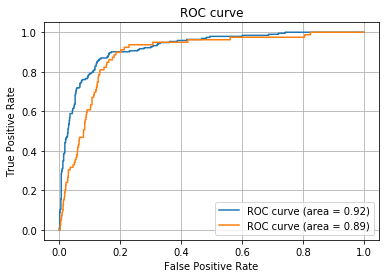

In [928]:
## アンダーサンプリング
X_train_smp, y_train_smp = UnderSampling(X_train, y_train)
## 標準化
X_train_smp_std, X_test_smp_std = standard(X_train_smp, X_test)
## 学習
clf = SVC(C=10, kernel='rbf', gamma=0.005, probability=True, random_state=5678)
clf.fit(X_train_smp_std, y_train_smp)
## 精度を表示
accuracy("SVM_Under", clf, X_train_smp_std, y_train_smp, X_test_smp_std, y_test)

------------------------------

===  精度検証（レポート用データを確認）
0.9371451743714517


,predict(0),predict(1)
target(0),2292,123
target(1),32,19



==== ROC 
AUC: 0.881748061543458


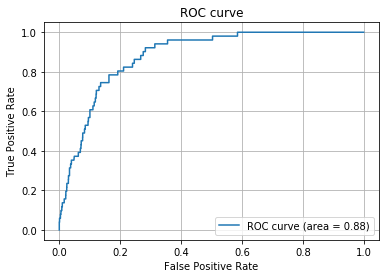

In [929]:
## データ前処理
reportX, reporty = preprocess(accuracy_report)
## 標準化
X_train_smp_std, reportX_std = standard(X_train_smp, reportX)
## レポート用の精度
report_ACC("SVM_Under", clf, reportX_std, reporty)


==== オーバーサンプリングを行う
RandomOverSampler(random_state=1234, sampling_strategy={0: 6868, 1: 1373})
-----------------------------------------------------
サンプリング後の説明変数の数と件数：(8241, 25)
サンプリング後の目的変数の数と件数：(8241, 1)
-----------------------------------------------------
サンプリング後の目的変数＝ 0 の件数：6868
サンプリング後の目的変数＝ 1 の件数：1373
-----------------------------------------------------

===  精度検証（訓練用データを確認）
0.904623225336731


,predict(0),predict(1)
target(0),6706,162
target(1),624,749



===  精度検証（検証用データを確認）
0.9448298645523621


,predict(0),predict(1)
target(0),2835,113
target(1),54,25



 ==== ROC 
AUC(train): 0.9301238079765305
AUC(test): 0.8686880614190269
AUC ratio(train/test): 1.0707224483517668


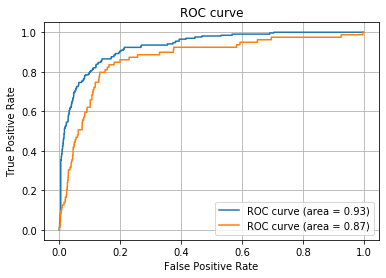

In [930]:
## アンダーサンプリング
X_train_smp, y_train_smp = OverSampling(X_train, y_train)
## 標準化
X_train_smp_std, X_test_smp_std = standard(X_train_smp, X_test)
## 学習
clf = SVC(C=10, kernel='rbf', gamma=0.005, probability=True, random_state=5678)
clf.fit(X_train_smp_std, y_train_smp)
## 精度を表示
accuracy("SVM_Over", clf, X_train_smp_std, y_train_smp, X_test_smp_std, y_test)

------------------------------

===  精度検証（レポート用データを確認）
0.9537712895377128


,predict(0),predict(1)
target(0),2337,78
target(1),36,15



==== ROC 
AUC: 0.8175455689522185


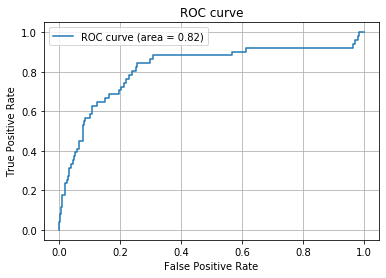

In [931]:
## データ前処理
reportX, reporty = preprocess(accuracy_report)
## 標準化
X_train_smp_std, reportX_std = standard(X_train_smp, reportX)
## レポート用の精度
report_ACC("SVM_Over", clf, reportX_std, reporty)


==== (SMOTE) オーバーサンプリングを行う
SMOTE(k_neighbors=3, random_state=1234)
-----------------------------------------------------
サンプリング後の説明変数の数と件数：(13736, 25)
サンプリング後の目的変数の数と件数：(13736, 1)
-----------------------------------------------------
サンプリング後の目的変数＝ 0 の件数：6868
サンプリング後の目的変数＝ 1 の件数：6868
-----------------------------------------------------

===  精度検証（訓練用データを確認）
0.89917006406523


,predict(0),predict(1)
target(0),6027,841
target(1),544,6324



===  精度検証（検証用データを確認）
0.865213082259663


,predict(0),predict(1)
target(0),2569,379
target(1),29,50



 ==== ROC 
AUC(train): 0.9547899503712404
AUC(test): 0.8395479449702007
AUC ratio(train/test): 1.1372667351417673


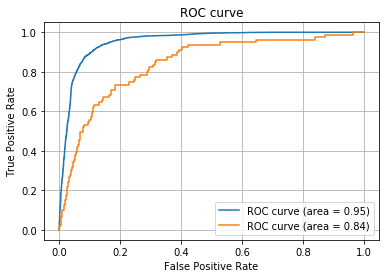

In [932]:
## アンダーサンプリング
X_train_smp, y_train_smp = SMOTESampling(X_train, y_train)
## 標準化
X_train_smp_std, X_test_smp_std = standard(X_train_smp, X_test)
## 学習
clf = SVC(C=10, kernel='rbf', gamma=0.005, probability=True, random_state=5678)
clf.fit(X_train_smp_std, y_train_smp)
## 精度を表示
accuracy("SVM_SMOTE", clf, X_train_smp_std, y_train_smp, X_test_smp_std, y_test)

------------------------------

===  精度検証（レポート用データを確認）
0.8722627737226277


,predict(0),predict(1)
target(0),2124,291
target(1),24,27



==== ROC 
AUC: 0.8096943125076118


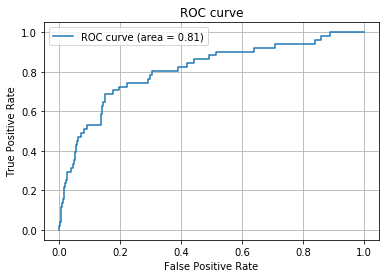

In [933]:
## データ前処理
reportX, reporty = preprocess(accuracy_report)
## 標準化
X_train_smp_std, reportX_std = standard(X_train_smp, reportX)
## レポート用の精度
report_ACC("SVM_SMOTE", clf, reportX_std, reporty)

# ランダムフォレスト
*   criterion：分割を決定するのに用いる不純度を決めます。'gini'ならばジニ係数、'entropy'ならばエントロピーを不純度として用います。
*   max_leaf_nodes：最大の葉の数をきめます。ここで指定した葉の数以内で、もっともcriterionが低くなるように木が成長します。
*   n_estimators：弱学習器の数を指定します。
*   random_state：分割の閾値を決めるときに乱数をしようする場合があり、その際のシードの値を入力します。（値を定めておくと処理の再現性が得られます）

In [934]:
# ランダムフォレスト用ライブラリをインポート
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_leaf_nodes=4, criterion='gini', n_estimators=100, random_state=1234)


==== アンダーサンプリングを行う
RandomUnderSampler(random_state=1234, sampling_strategy={0: 768, 1: 192})
-----------------------------------------------------
サンプリング後の説明変数の数と件数：(960, 25)
サンプリング後の目的変数の数と件数：(960, 1)
-----------------------------------------------------
サンプリング後の目的変数＝ 0 の件数：768
サンプリング後の目的変数＝ 1 の件数：192
-----------------------------------------------------

===  精度検証（訓練用データを確認）
0.85


,predict(0),predict(1)
target(0),751,17
target(1),127,65



===  精度検証（検証用データを確認）
0.9454905847373637


,predict(0),predict(1)
target(0),2833,115
target(1),50,29



 ==== ROC 
AUC(train): 0.9053582085503472
AUC(test): 0.8791800491214813
AUC ratio(train/test): 1.0297756522739845


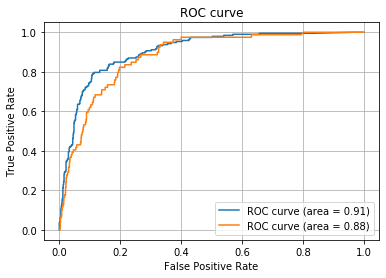

In [935]:
## アンダーサンプリング
X_train_smp, y_train_smp = UnderSampling(X_train, y_train)
## 標準化
X_train_smp_std, X_test_smp_std = standard(X_train_smp, X_test)
## 学習
clf.fit(X_train_smp_std, y_train_smp)
## 精度を表示
accuracy("RandomForest_Under", clf, X_train_smp_std, y_train_smp, X_test_smp_std, y_test)

------------------------------

===  精度検証（レポート用データを確認）
0.9533657745336578


,predict(0),predict(1)
target(0),2337,78
target(1),37,14



==== ROC 
AUC: 0.8873421832501116


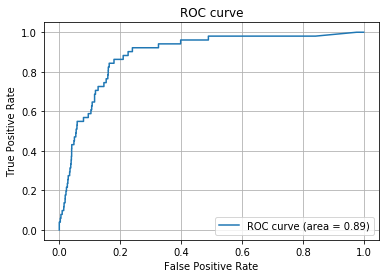

In [936]:
## データ前処理
reportX, reporty = preprocess(accuracy_report)
## 標準化
X_train_smp_std, reportX_std = standard(X_train_smp, reportX)
## レポート用の精度
report_ACC("RandomForest_Under", clf, reportX_std, reporty)


==== オーバーサンプリングを行う
RandomOverSampler(random_state=1234, sampling_strategy={0: 6868, 1: 1373})
-----------------------------------------------------
サンプリング後の説明変数の数と件数：(8241, 25)
サンプリング後の目的変数の数と件数：(8241, 1)
-----------------------------------------------------
サンプリング後の目的変数＝ 0 の件数：6868
サンプリング後の目的変数＝ 1 の件数：1373
-----------------------------------------------------

===  精度検証（訓練用データを確認）
0.8531731585972576


,predict(0),predict(1)
target(0),6808,60
target(1),1150,223



===  精度検証（検証用データを確認）
0.96399074991741


,predict(0),predict(1)
target(0),2904,44
target(1),65,14



 ==== ROC 
AUC(train): 0.8955097921856792
AUC(test): 0.8711076378750666
AUC ratio(train/test): 1.0280127888330055


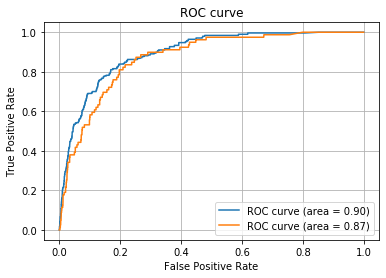

In [937]:
## オーバーサンプリング
X_train_smp, y_train_smp = OverSampling(X_train, y_train)
## 標準化
X_train_smp_std, X_test_smp_std = standard(X_train_smp, X_test)
## 学習
clf.fit(X_train_smp_std, y_train_smp)
## 精度を表示
accuracy("RandomForest_Over", clf, X_train_smp_std, y_train_smp, X_test_smp_std, y_test)

------------------------------

===  精度検証（レポート用データを確認）
0.9708029197080292


,predict(0),predict(1)
target(0),2390,25
target(1),47,4



==== ROC 
AUC: 0.8861243047943815


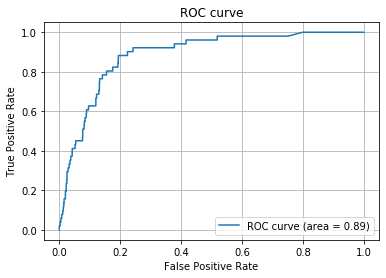

In [938]:
## データ前処理
reportX, reporty = preprocess(accuracy_report)
## 標準化
X_train_smp_std, reportX_std = standard(X_train_smp, reportX)
## レポート用の精度
report_ACC("RandomForest_Over", clf, reportX_std, reporty)


==== (SMOTE) オーバーサンプリングを行う
SMOTE(k_neighbors=3, random_state=1234)
-----------------------------------------------------
サンプリング後の説明変数の数と件数：(13736, 25)
サンプリング後の目的変数の数と件数：(13736, 1)
-----------------------------------------------------
サンプリング後の目的変数＝ 0 の件数：6868
サンプリング後の目的変数＝ 1 の件数：6868
-----------------------------------------------------

===  精度検証（訓練用データを確認）
0.828407105416424


,predict(0),predict(1)
target(0),5610,1258
target(1),1099,5769



===  精度検証（検証用データを確認）
0.8031053848695078


,predict(0),predict(1)
target(0),2374,574
target(1),22,57



 ==== ROC 
AUC(train): 0.9113051603089322
AUC(test): 0.8509867234598012
AUC ratio(train/test): 1.0708805850741105


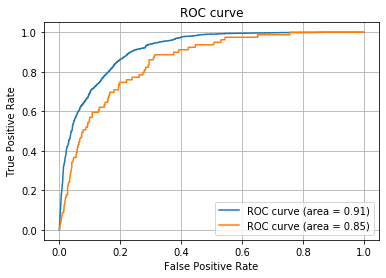

In [939]:
## SMOTE サンプリング
X_train_smp, y_train_smp = SMOTESampling(X_train, y_train)
## 標準化
X_train_smp_std, X_test_smp_std = standard(X_train_smp, X_test)
## 学習
clf.fit(X_train_smp_std, y_train_smp)
## 精度を表示
accuracy("RandomForest_SMOTE", clf, X_train_smp_std, y_train_smp, X_test_smp_std, y_test)

------------------------------

===  精度検証（レポート用データを確認）
0.8369829683698297


,predict(0),predict(1)
target(0),2029,386
target(1),16,35



==== ROC 
AUC: 0.8615678155320099


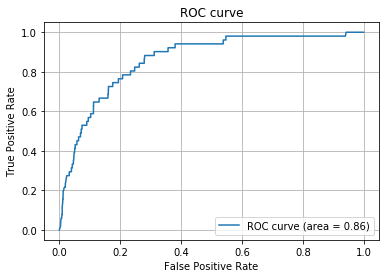

In [940]:
## データ前処理
reportX, reporty = preprocess(accuracy_report)
## 標準化
X_train_smp_std, reportX_std = standard(X_train_smp, reportX)
## レポート用の精度
report_ACC("RandomForest_SMOTE", clf, reportX_std, reporty)

# LightGBM
*   num_leaves：決定木の葉の数を指定します。ここで指定した葉の数以内で木が成長します。
*   max_depth：最大の枝の深さをきめます。ここで指定した枝の深さ以内で木が成長します。
*   min_child_samples：１つの葉を構成するための最低サンプル数をきめます。ここで指定したサンプル数を下回る葉は作成されません。
*   n_estimators：弱学習器の数を指定します。
*   random_state：分割の閾値を決めるときに乱数をしようする場合があり、その際のシードの値を入力します。（値を定めておくと処理の再現性が得られます）

In [941]:
# LightGBM用ライブラリをインポート
from lightgbm import LGBMClassifier
clf = LGBMClassifier(num_leaves=4, max_depth=3, min_child_samples=10, n_estimators=100, andom_state=1234)


==== アンダーサンプリングを行う
RandomUnderSampler(random_state=1234, sampling_strategy={0: 768, 1: 192})
-----------------------------------------------------
サンプリング後の説明変数の数と件数：(960, 25)
サンプリング後の目的変数の数と件数：(960, 1)
-----------------------------------------------------
サンプリング後の目的変数＝ 0 の件数：768
サンプリング後の目的変数＝ 1 の件数：192
-----------------------------------------------------

===  精度検証（訓練用データを確認）
0.934375


,predict(0),predict(1)
target(0),749,19
target(1),44,148



===  精度検証（検証用データを確認）
0.9160885365047903


,predict(0),predict(1)
target(0),2730,218
target(1),36,43



 ==== ROC 
AUC(train): 0.9812486436631944
AUC(test): 0.8921989591742094
AUC ratio(train/test): 1.099809222565566


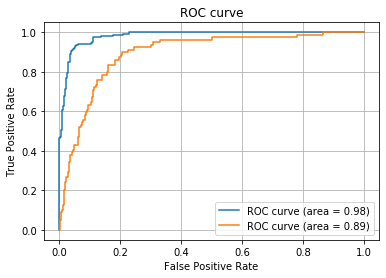

In [942]:
## アンダーサンプリング
X_train_smp, y_train_smp = UnderSampling(X_train, y_train)
## 標準化
X_train_smp_std, X_test_smp_std = standard(X_train_smp, X_test)
## 学習
clf.fit(X_train_smp_std, y_train_smp)
## 精度を表示
accuracy("LGBM_Under", clf, X_train_smp_std, y_train_smp, X_test_smp_std, y_test)

------------------------------

===  精度検証（レポート用データを確認）
0.9237631792376317


,predict(0),predict(1)
target(0),2251,164
target(1),24,27



==== ROC 
AUC: 0.8848455324158649


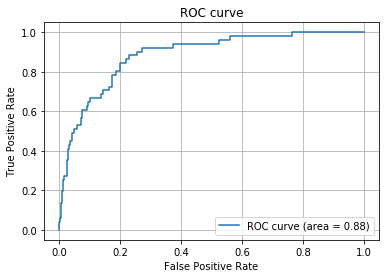

In [943]:
## データ前処理
reportX, reporty = preprocess(accuracy_report)
## 標準化
X_train_smp_std, reportX_std = standard(X_train_smp, reportX)
## レポート用の精度
report_ACC("LGBM_Under", clf, reportX_std, reporty)


==== オーバーサンプリングを行う
RandomOverSampler(random_state=1234, sampling_strategy={0: 6868, 1: 1373})
-----------------------------------------------------
サンプリング後の説明変数の数と件数：(8241, 25)
サンプリング後の目的変数の数と件数：(8241, 1)
-----------------------------------------------------
サンプリング後の目的変数＝ 0 の件数：6868
サンプリング後の目的変数＝ 1 の件数：1373
-----------------------------------------------------

===  精度検証（訓練用データを確認）
0.9223395219026818


,predict(0),predict(1)
target(0),6665,203
target(1),437,936



===  精度検証（検証用データを確認）
0.9511067063098778


,predict(0),predict(1)
target(0),2842,106
target(1),42,37



 ==== ROC 
AUC(train): 0.9703827158346701
AUC(test): 0.889654861480858
AUC ratio(train/test): 1.090740643196664


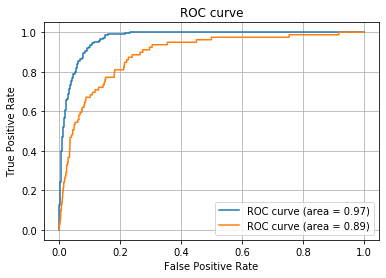

In [944]:
## オーバーサンプリング
X_train_smp, y_train_smp = OverSampling(X_train, y_train)
## 標準化
X_train_smp_std, X_test_smp_std = standard(X_train_smp, X_test)
## 学習
clf.fit(X_train_smp_std, y_train_smp)
## 精度を表示
accuracy("LGBM_Over", clf, X_train_smp_std, y_train_smp, X_test_smp_std, y_test)

------------------------------

===  精度検証（レポート用データを確認）
0.9513381995133819


,predict(0),predict(1)
target(0),2328,87
target(1),33,18



==== ROC 
AUC: 0.882937522835221


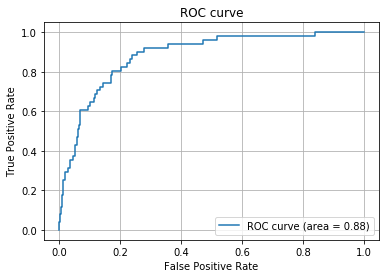

In [945]:
## データ前処理
reportX, reporty = preprocess(accuracy_report)
## 標準化
X_train_smp_std, reportX_std = standard(X_train_smp, reportX)
## レポート用の精度
report_ACC("LGBM_Over", clf, reportX_std, reporty)


==== (SMOTE) オーバーサンプリングを行う
SMOTE(k_neighbors=3, random_state=1234)
-----------------------------------------------------
サンプリング後の説明変数の数と件数：(13736, 25)
サンプリング後の目的変数の数と件数：(13736, 1)
-----------------------------------------------------
サンプリング後の目的変数＝ 0 の件数：6868
サンプリング後の目的変数＝ 1 の件数：6868
-----------------------------------------------------

===  精度検証（訓練用データを確認）
0.9100902737332557


,predict(0),predict(1)
target(0),6033,835
target(1),400,6468



===  精度検証（検証用データを確認）
0.8648827221671622


,predict(0),predict(1)
target(0),2562,386
target(1),23,56



 ==== ROC 
AUC(train): 0.9661187615943753
AUC(test): 0.8522233481613797
AUC ratio(train/test): 1.1336450282413855


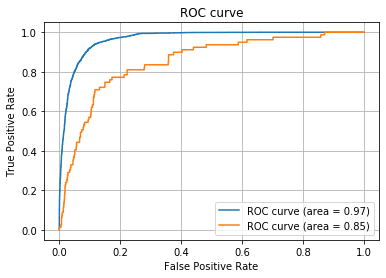

In [946]:
## アンダーサンプリング
X_train_smp, y_train_smp = SMOTESampling(X_train, y_train)
## 標準化
X_train_smp_std, X_test_smp_std = standard(X_train_smp, X_test)
## 学習
clf.fit(X_train_smp_std, y_train_smp)
## 精度を表示
accuracy("LGBM_SMOTE", clf, X_train_smp_std, y_train_smp, X_test_smp_std, y_test)

------------------------------

===  精度検証（レポート用データを確認）
0.8787510137875101


,predict(0),predict(1)
target(0),2133,282
target(1),17,34



==== ROC 
AUC: 0.8644257703081233


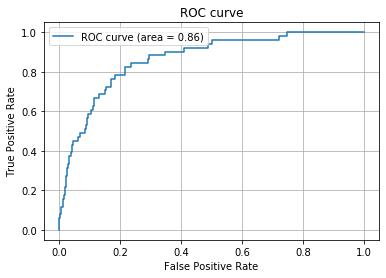

In [947]:
## データ前処理
reportX, reporty = preprocess(accuracy_report)
## 標準化
X_train_smp_std, reportX_std = standard(X_train_smp, reportX)
## レポート用の精度
report_ACC("LGBM_SMOTE", clf, reportX_std, reporty)

# 結果まとめ

In [948]:
result = result.sort_index(axis=0)
result

,訓練精度%,検証精度%,AUC(訓練),AUC(検証),AUC rate,訓練(TN 0->0)%,訓練(FP 0->1)%,訓練(FN 1->0)%,訓練(TP 1->1)%,検証(TN 0->0)%,検証(FP 0->1)%,検証(FN 1->0)%,検証(TP 1->1)%
LGBM_Over,92.233952,95.110671,0.970383,0.889655,1.090741,97.044263,2.955737,31.828114,68.171886,96.404342,3.595658,53.164557,46.835443
LGBM_SMOTE,91.009027,86.488272,0.966119,0.852223,1.133645,87.842167,12.157833,5.824112,94.175888,86.906377,13.093623,29.113924,70.886076
LGBM_Under,93.437500,91.608854,0.981249,0.892199,1.099809,97.526042,2.473958,22.916667,77.083333,92.605156,7.394844,45.569620,54.430380
Logistic_Over,87.052542,94.086554,0.892752,0.870936,1.025049,96.389051,3.610949,59.650401,40.349599,95.861601,4.138399,72.151899,27.848101
Logistic_SMOTE,85.556203,84.142716,0.916386,0.870970,1.052144,83.969132,16.030868,12.856727,87.143273,84.294437,15.705563,21.518987,78.481013
Logistic_Under,86.250000,92.368682,0.903219,0.871267,1.036673,95.442708,4.557292,50.520833,49.479167,93.860244,6.139756,63.291139,36.708861
RandomForest_Over,85.317316,96.399075,0.895510,0.871108,1.028013,99.126383,0.873617,83.758194,16.241806,98.507463,1.492537,82.278481,17.721519
RandomForest_SMOTE,82.840711,80.310538,0.911305,0.850987,1.070881,81.683168,18.316832,16.001747,83.998253,80.529172,19.470828,27.848101,72.151899
RandomForest_Under,85.000000,94.549058,0.905358,0.879180,1.029776,97.786458,2.213542,66.145833,33.854167,96.099050,3.900950,63.291139,36.708861
SVM_Over,90.462323,94.482986,0.930124,0.868688,1.070722,97.641235,2.358765,45.447924,54.552076,96.166893,3.833107,68.354430,31.645570


In [949]:
result_report = result_report.sort_index(axis=0)
result_report

,accuracy(%),AUC,(TN 0->0)%,(FP 0->1)%,(FN 1->0)%,(TP 1->1)%
LGBM_Over,95.133820,0.882938,96.397516,3.602484,64.705882,35.294118
LGBM_SMOTE,87.875101,0.864426,88.322981,11.677019,33.333333,66.666667
LGBM_Under,92.376318,0.884846,93.209110,6.790890,47.058824,52.941176
Logistic_Over,95.093268,0.866488,96.231884,3.768116,58.823529,41.176471
Logistic_SMOTE,84.752636,0.869419,84.968944,15.031056,25.490196,74.509804
Logistic_Under,93.998378,0.876889,94.948240,5.051760,50.980392,49.019608
RandomForest_Over,97.080292,0.886124,98.964803,1.035197,92.156863,7.843137
RandomForest_SMOTE,83.698297,0.861568,84.016563,15.983437,31.372549,68.627451
RandomForest_Under,95.336577,0.887342,96.770186,3.229814,72.549020,27.450980
SVM_Over,95.377129,0.817546,96.770186,3.229814,70.588235,29.411765


### グラフ化

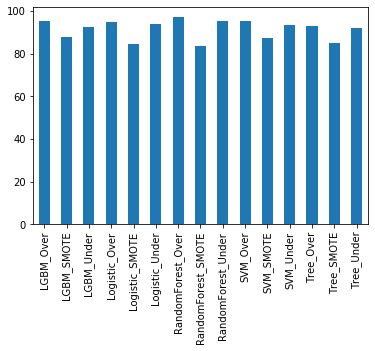

In [950]:
result_report["accuracy(%)"].plot(kind='bar');

### 倒産する企業を「倒産する」と予測したもの

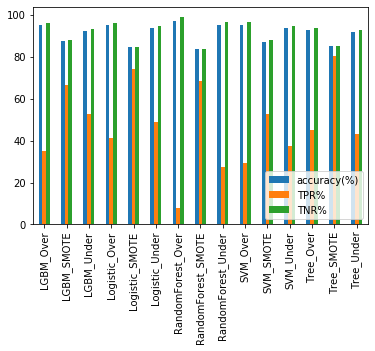

In [958]:
result_report.rename(columns={'(TP 1->1)%':'TPR%', '(TN 0->0)%':'TNR%'}, inplace=True)
result_report.plot(y=['accuracy(%)', 'TPR%', 'TNR%'], kind='bar').legend(loc='lower right');